# Data retrieval European Central Bank - Ester rates 

In [1]:
import requests     # 2.18.4
import pandas as pd # 0.23.0
import io

In [14]:
DATAFLOW = "EST"
FREQ = "B"
DATA_TYPE_FM = "EU000A2QQF16.CR"
start_period = '2019-01-01'
end_period = '2023-03-09'
parameters = {
    "startPeriod": start_period,
    "endPeriod": end_period,
}
url = (
    f"https://sdw-wsrest.ecb.europa.eu/service/data/"
    f"{DATAFLOW}/{FREQ}.{DATA_TYPE_FM}"
)
response = requests.get(url, params=parameters,headers={"Accept": "text/csv"})
# Check if the response returns succesfully with response code 200
print(response)

# Print the full URL
print(response.url)

<Response [200]>
https://sdw-wsrest.ecb.europa.eu/service/data/EST/B.EU000A2QQF16.CR?startPeriod=2019-01-01&endPeriod=2023-03-09


In [15]:
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

In [16]:
# Check the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KEY                880 non-null    object 
 1   FREQ               880 non-null    object 
 2   BENCHMARK_ITEM     880 non-null    object 
 3   DATA_TYPE_EST      880 non-null    object 
 4   TIME_PERIOD        880 non-null    object 
 5   OBS_VALUE          880 non-null    float64
 6   OBS_STATUS         880 non-null    object 
 7   CONF_STATUS        880 non-null    object 
 8   PRE_BREAK_VALUE    0 non-null      float64
 9   COMMENT_OBS        0 non-null      float64
 10  CALCUL_START_DATE  0 non-null      float64
 11  CALCUL_END_DATE    0 non-null      float64
 12  TIME_FORMAT        880 non-null    object 
 13  BREAKS             0 non-null      float64
 14  COMMENT_TS         0 non-null      float64
 15  COMPILING_ORG      0 non-null      float64
 16  COVERAGE           880 non

In [17]:
# Show the last 5 entries of the DataFrame
df.tail()

,KEY,FREQ,BENCHMARK_ITEM,DATA_TYPE_EST,TIME_PERIOD,OBS_VALUE,OBS_STATUS,CONF_STATUS,PRE_BREAK_VALUE,COMMENT_OBS,...,DISS_ORG,PUBL_ECB,PUBL_MU,PUBL_PUBLIC,TIME_PER_COLLECT,TITLE,TITLE_COMPL,UNIT_INDEX_BASE,UNIT_MEASURE,UNIT_MULT
875,EST.B.EU000A2QQF16.CR,B,EU000A2QQF16,CR,2023-03-03,2.39712,A,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Compounded euro short-term rate average rate, ...","Compounded euro short-term rate average rate, ...",NaN,NaN,0
876,EST.B.EU000A2QQF16.CR,B,EU000A2QQF16,CR,2023-03-06,2.39798,A,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Compounded euro short-term rate average rate, ...","Compounded euro short-term rate average rate, ...",NaN,NaN,0
877,EST.B.EU000A2QQF16.CR,B,EU000A2QQF16,CR,2023-03-07,2.39812,A,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Compounded euro short-term rate average rate, ...","Compounded euro short-term rate average rate, ...",NaN,NaN,0
878,EST.B.EU000A2QQF16.CR,B,EU000A2QQF16,CR,2023-03-08,2.39955,A,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Compounded euro short-term rate average rate, ...","Compounded euro short-term rate average rate, ...",NaN,NaN,0
879,EST.B.EU000A2QQF16.CR,B,EU000A2QQF16,CR,2023-03-09,2.39970,A,F,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Compounded euro short-term rate average rate, ...","Compounded euro short-term rate average rate, ...",NaN,NaN,0


In [18]:
# Create a new DataFrame called 'ts'
ts = df.filter(['TIME_PERIOD', 'BENCHMARK_ITEM', 'OBS_VALUE'], axis=1)
# 'TIME_PERIOD' was of type 'object' (as seen in df.info). Convert it to datetime first
ts['TIME_PERIOD'] = pd.to_datetime(ts['TIME_PERIOD'])
# Set 'TIME_PERIOD' to be the index
ts = ts.set_index('TIME_PERIOD')
# Print the last 5 rows to screen
ts.tail()

,BENCHMARK_ITEM,OBS_VALUE
TIME_PERIOD,,
2023-03-03,EU000A2QQF16,2.39712
2023-03-06,EU000A2QQF16,2.39798
2023-03-07,EU000A2QQF16,2.39812
2023-03-08,EU000A2QQF16,2.39955
2023-03-09,EU000A2QQF16,2.39970


<AxesSubplot:xlabel='TIME_PERIOD'>

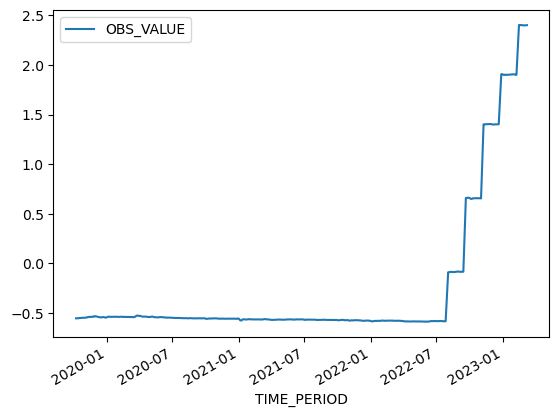

In [19]:
%matplotlib inline
ts.plot()